# Sobel Example 3

### This note book shows the Sobel filtering using 4 directional edge detection filter
### and absolute operator

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# function to keep the valid part after convolution 
def am_valid_part(a,N):
    cff = int(N/2)
    M = a.shape
    if len(M)==3:
        return a[cff:M[0]-cff, cff:M[1]-cff, :]
    else:
        return a[cff:M[0]-cff, cff:M[1]-cff]

In [3]:
#image = cv2.imread('test1.bmp')
image = cv2.imread('cw1/06600600u.bmp')

# Print error message if image is nul
# thr decides edges that we wanna keep in the final output. edges stronger than thr*maximum_strength would be kept. 
# e.g., thr = 0.7, edgest with strength higher than 0.7*maximum_strength would be kept

# this threshold determines the edges that we'd like to keep after configuration of edge strength map, 
thr = 0.99

if image is None:
    print('Could not read image')

# define the filter kernels 
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
hsx = np.array([[-1 , 0 , 1] , [-2 , 0 , 2] , [-1 , 0 , 1]])
hsy = np.array([[-1 , -2 , -1] , [0 , 0 , 0] , [1 , 2 , 1]])
h45 = np.array([[0 , 1 , 2] , [-1 , 0 , 1] , [-2, -1, 0]])
h135 = np.array([[-2, -1, 0] , [-1, 0, 1] , [0, 1, 2]])
   

In [4]:
## how to use?
## cv.filter2D(	src, ddepth, kernel[, dst[, anchor[, delta[, borderType]]]]	) ->	dst


In [5]:
# horizontal and vertical and diagonal edge detection
Gx = cv2.filter2D(src=image, ddepth=-1, kernel=hsx)
Gy = cv2.filter2D(src=image, ddepth=-1, kernel=hsy)
G45 = cv2.filter2D(src=image, ddepth=-1, kernel=h45)
G135 = cv2.filter2D(src=image, ddepth=-1, kernel=h135)

# keeping the valid part
Gx = am_valid_part(Gx,3)
Gy = am_valid_part(Gy,3)
G45 = am_valid_part(G45,3)
G135 = am_valid_part(G135,3)


# showing the results
cv2.namedWindow("Original", cv2.WINDOW_NORMAL)
cv2.imshow('Original', image)
cv2.namedWindow("Gx", cv2.WINDOW_NORMAL)
cv2.imshow('Gx', Gx)
cv2.namedWindow("Gy", cv2.WINDOW_NORMAL)
cv2.imshow('Gy', Gy)
cv2.namedWindow("G45", cv2.WINDOW_NORMAL)
cv2.imshow('G45', G45)
cv2.namedWindow("G135", cv2.WINDOW_NORMAL)
cv2.imshow('G135', G135)

cv2.waitKey()
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

In [8]:
# computing the edge strength and direction matrices, Gabs and Gdir 
# using absolute method
Gabs = (np.abs(Gx) + np.abs(Gy) + np.abs(G45) + np.abs(G135)) / 4 
Gdir = np.arctan(np.divide(Gy,(Gx+0.00001)))

In [9]:
# showing thE EDGE STRENGTH MAP, Gabs
cv2.namedWindow("GABS", cv2.WINDOW_NORMAL)
cv2.imshow('GABS', np.uint8(Gabs))
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

In [8]:
M=Gabs.shape
print(Gabs)

[[ 8.    2.25  0.5  ...  0.    1.75 12.75]
 [ 0.25  0.    2.25 ...  0.    5.75 19.25]
 [ 4.75  0.    6.   ...  0.    0.   19.  ]
 ...
 [ 2.5  10.    7.75 ... 14.    6.5   3.5 ]
 [ 2.    4.    0.   ...  6.    0.    1.25]
 [ 3.    1.75  0.   ...  2.    3.    6.  ]]


In [9]:
print(Gdir)
# point 1.57 ~= pi/2   :-)

[[1.570796   1.57079522 1.57079133 ... 0.         0.         0.        ]
 [0.         0.         1.57079522 ... 0.         0.         0.        ]
 [0.         0.         1.5707957  ... 0.         0.         0.        ]
 ...
 [1.57079533 1.10714822 1.00406646 ... 0.14189699 0.         0.        ]
 [1.57079508 1.57079542 0.         ... 1.40564684 0.         0.        ]
 [1.24904427 1.5707949  0.         ... 0.         1.57079533 1.5707957 ]]


In [10]:
# applyiing a threshold on the edge strength matrix, using the thr parameter and the maximum strength of edges
# we only keep the edges which are stronger that max*thr, where max is the maximum strength of edges in Gabs
# result is a binary image where only strong edges stay 1
thr = np.max(Gabs) * thr
abs_thr = (Gabs >= thr)
print(abs_thr)

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


In [11]:
print('Number of pixels left as strong edges=', np.sum(abs_thr))
# showing the outcome as a binary image
abs_thr= np.uint8(abs_thr * 100)
cv2.namedWindow("edges", cv2.WINDOW_NORMAL)
cv2.imshow('edges', abs_thr)

Number of pixels left on strong edges= 10610


In [12]:
cv2.waitKey()
cv2.destroyAllWindows()

Text(0.5, 1.0, 'G135')

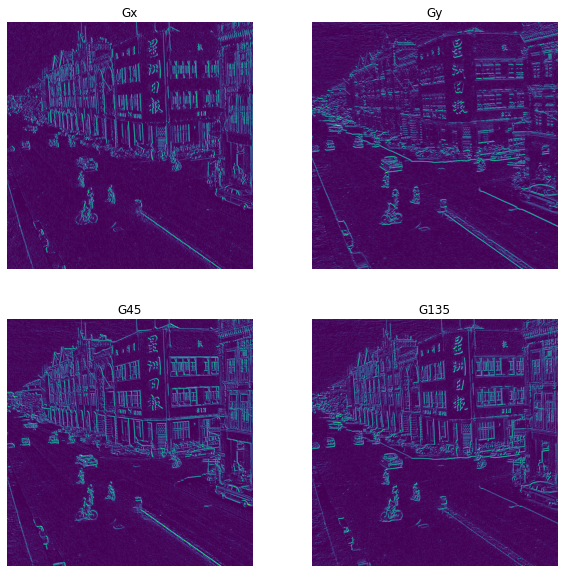

In [13]:
# create figure
fig = plt.figure(figsize=(10,10))

# setting values to rows and column variables
rows = 2
columns = 2

# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)

# showing image
plt.imshow(Gx)
plt.axis('off')
plt.title("Gx")

# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)

# showing image
plt.imshow(Gy)
plt.axis('off')
plt.title("Gy")

# Adds a subplot at the 3rd position
fig.add_subplot(rows, columns, 3)

# showing image
plt.imshow(G45)
plt.axis('off')
plt.title("G45")

# Adds a subplot at the 4th position
fig.add_subplot(rows, columns, 4)

# showing image
plt.imshow(G135)
plt.axis('off')
plt.title("G135")


Text(0.5, 1.0, 'Edges Map after thresholding')

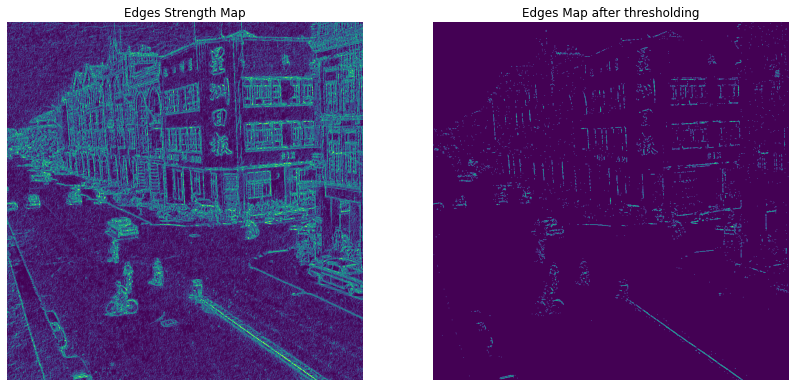

In [14]:
# create figure
fig2 = plt.figure(figsize=(14,14))

# setting values to rows and column variables
rows = 1
columns = 2

# Adds a subplot at the 1st position
fig2.add_subplot(rows, columns, 1)

# showing image
plt.imshow(Gabs)
plt.axis('off')
plt.title("Edges Strength Map")

# Adds a subplot at the 2nd position
fig2.add_subplot(rows, columns, 2)

# showing image
plt.imshow(abs_thr)
plt.axis('off')
plt.title("Edges Map after thresholding")
